<a href="https://colab.research.google.com/github/GuilhermeDumam/EDA_Vendas_MagazineLuiza-Luizalabs-/blob/Master/EDA_Vendas_MagazineLuiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E.D.A dos dados de vendas do Magazine Luiza (LuizaLabs). 
Realizaremos uma exploração em busca de informações e oportunidades, baseado na segmentação dos produtos.

Segue link para o dataset: https://s3.amazonaws.com/big-data-public/desafio/desafio.csv.gz

### Importando bibliotecas e tratando os dados.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
dfluiza = pd.read_csv('/content/desafio (1).csv', sep = ',')

In [20]:
dfluiza.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,capture_date,process_date,process_status,source_channel
0,bcb59c839e78b2601374cbad9239ca7b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500
1,4e91ee6b95895771dc9ee524e910a902,e6762ba2ffbca07ab6cee7551caeaad5,1,1036.29,95.8568,176.1693,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,em rota de entrega,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500
2,88eb0ac86af1a521c0831298d22dea8b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-12,2016-06-12,processado,b76eb9b8fc0f17098812da9117d3e500
3,dee418152a36314b4aee6ce9cf94fcbf,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,176.2020,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,cancelado,2016-06-13,0000-00-00,captado,b76eb9b8fc0f17098812da9117d3e500
4,1c175bc61b9b659bbf011b2e5e3dcec6,e6762ba2ffbca07ab6cee7551caeaad5,1,976.05,90.2846,0.0000,192.3325,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-13,2016-06-13,processado,b76eb9b8fc0f17098812da9117d3e500


In [21]:
dfluiza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179149 entries, 0 to 179148
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          179149 non-null  object 
 1   code              179149 non-null  object 
 2   quantity          179149 non-null  int64  
 3   price             179149 non-null  float64
 4   pis_cofins        179149 non-null  float64
 5   icms              179149 non-null  float64
 6   tax_substitution  179149 non-null  float64
 7   category          179149 non-null  object 
 8   liquid_cost       179149 non-null  float64
 9   order_status      179149 non-null  object 
 10  capture_date      179149 non-null  object 
 11  process_date      179149 non-null  object 
 12  process_status    179149 non-null  object 
 13  source_channel    179149 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 19.1+ MB


In [22]:
dfluiza[dfluiza.duplicated()]

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,capture_date,process_date,process_status,source_channel


In [23]:
dfluiza.isna().sum()/dfluiza.shape[0]

order_id            0.0
code                0.0
quantity            0.0
price               0.0
pis_cofins          0.0
icms                0.0
tax_substitution    0.0
category            0.0
liquid_cost         0.0
order_status        0.0
capture_date        0.0
process_date        0.0
process_status      0.0
source_channel      0.0
dtype: float64

In [24]:
dfluiza['capture_date']= pd.to_datetime(dfluiza['capture_date'])

In [25]:
dfluiza['process_date']= pd.to_datetime(dfluiza['process_date'], errors = 'coerce')

##Entendendo como que um produto variou tanto.

In [26]:
dfluiza['preco_unitario'] = dfluiza['price'] / dfluiza['quantity']
dfluiza.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,capture_date,process_date,process_status,source_channel,preco_unitario
0,bcb59c839e78b2601374cbad9239ca7b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500,978.90
1,4e91ee6b95895771dc9ee524e910a902,e6762ba2ffbca07ab6cee7551caeaad5,1,1036.29,95.8568,176.1693,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,em rota de entrega,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500,1036.29
2,88eb0ac86af1a521c0831298d22dea8b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-12,2016-06-12,processado,b76eb9b8fc0f17098812da9117d3e500,978.90
3,dee418152a36314b4aee6ce9cf94fcbf,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,176.2020,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,cancelado,2016-06-13,NaT,captado,b76eb9b8fc0f17098812da9117d3e500,978.90
4,1c175bc61b9b659bbf011b2e5e3dcec6,e6762ba2ffbca07ab6cee7551caeaad5,1,976.05,90.2846,0.0000,192.3325,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-13,2016-06-13,processado,b76eb9b8fc0f17098812da9117d3e500,976.05


In [27]:
dfluiza4 = dfluiza[(dfluiza.code == '4ceedf57303e127d31a164c7ae5791d8')]
dfluiza4.sort_values('quantity', ascending = False)

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,capture_date,process_date,process_status,source_channel,preco_unitario
33602,b691b8b973ba33cd8b9eb59e5211a94d,4ceedf57303e127d31a164c7ae5791d8,48,19152.00,1771.5600,0.000,78.3046,388128822cef4b4f102ae881e040a64b,241.6715,entrega total,2016-10-27,2016-10-27,processado,fc7020775a7cdf161ab5267985c54601,399.000000
33522,f2210c436f5f419bae88b4fa461d6db5,4ceedf57303e127d31a164c7ae5791d8,18,7774.39,719.1311,0.000,78.4730,388128822cef4b4f102ae881e040a64b,241.6715,entrega total,2016-09-29,2016-09-29,processado,98defd6ee70dfb1dea416cecdf391f58,431.910556
33914,dbde57cb88a527f0cdc3d551f41c75ec,4ceedf57303e127d31a164c7ae5791d8,2,983.98,91.0182,0.000,77.9968,388128822cef4b4f102ae881e040a64b,241.6715,entrega total,2017-04-10,2017-04-10,processado,b76eb9b8fc0f17098812da9117d3e500,491.990000
33347,96bb80a596e5cc1f55b507f0fc2064df,4ceedf57303e127d31a164c7ae5791d8,2,875.42,80.9764,0.000,76.1058,388128822cef4b4f102ae881e040a64b,241.6715,entrega total,2016-06-23,2016-06-23,processado,fc7020775a7cdf161ab5267985c54601,437.710000
33808,68f94d73bc6dad7058c6f531d8070f98,4ceedf57303e127d31a164c7ae5791d8,2,978.80,90.5390,176.184,0.0000,388128822cef4b4f102ae881e040a64b,241.6715,em rota de entrega,2017-03-08,2017-03-08,processado,b76eb9b8fc0f17098812da9117d3e500,489.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33503,b1dfb758a6dcffa239063e826e988d76,4ceedf57303e127d31a164c7ae5791d8,1,434.16,40.1598,0.000,78.6064,388128822cef4b4f102ae881e040a64b,241.6715,entrega total,2016-09-22,2016-09-22,processado,a578e71c3216f513a84ec6a46084fd3a,434.160000
33504,11e32662b5c400659c591b2748de4d2c,4ceedf57303e127d31a164c7ae5791d8,1,436.81,40.4049,0.000,78.6064,388128822cef4b4f102ae881e040a64b,241.6715,entrega total,2016-09-22,2016-09-22,processado,b76eb9b8fc0f17098812da9117d3e500,436.810000
33505,f500116aa59ea1e9f640c78f07ba4a91,4ceedf57303e127d31a164c7ae5791d8,1,489.40,45.2695,0.000,78.6064,388128822cef4b4f102ae881e040a64b,241.6715,entrega total,2016-09-22,2016-09-23,processado,fc7020775a7cdf161ab5267985c54601,489.400000
33506,383b43090b2e84c42396fd0d3ce04161,4ceedf57303e127d31a164c7ae5791d8,1,460.81,42.6249,0.000,78.6064,388128822cef4b4f102ae881e040a64b,241.6715,entrega total,2016-09-22,2016-09-22,processado,fc7020775a7cdf161ab5267985c54601,460.810000


In [28]:
filtro_preco2 = dfluiza4.groupby("code").agg({"preco_unitario": ["min", "max", "std", "mean"]}).reset_index()
filtro_preco2[(filtro_preco2.code == '4ceedf57303e127d31a164c7ae5791d8' )]

code preco_unitario  ...                       
                                               min  ...        std        mean
0  4ceedf57303e127d31a164c7ae5791d8          332.1  ...  39.759057  465.609504

[1 rows x 5 columns]

In [29]:
dfluiza3 = dfluiza.sort_values(by = 'preco_unitario', ascending = False)
dfluiza3.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,capture_date,process_date,process_status,source_channel,preco_unitario
147244,f95d905ebf48ceb43256565eae11f15a,8e5d2c3f2476cb5c507dd0f00f6eabda,1,1998.44,184.8557,349.727,0.000,90cc5bdd050bcd7cf0d50d079d0fda66,896.6814,entrega total,2016-09-06,2016-09-06,processado,b76eb9b8fc0f17098812da9117d3e500,1998.44
147297,c7d304126e967e8ef92a426e97c3e3da,8e5d2c3f2476cb5c507dd0f00f6eabda,1,1948.00,180.1900,331.160,0.000,90cc5bdd050bcd7cf0d50d079d0fda66,896.6814,entrega total,2016-12-26,2016-12-26,processado,fc7020775a7cdf161ab5267985c54601,1948.00
147296,43411e01d3357ec5ca61c16186beca39,8e5d2c3f2476cb5c507dd0f00f6eabda,1,1948.00,180.1900,331.160,0.000,90cc5bdd050bcd7cf0d50d079d0fda66,896.6814,cancelado,2016-12-22,NaT,captado,fc7020775a7cdf161ab5267985c54601,1948.00
147270,b8a9bb0db97e79e89d004d050b9efc9e,8e5d2c3f2476cb5c507dd0f00f6eabda,1,1948.00,180.1900,331.160,0.000,90cc5bdd050bcd7cf0d50d079d0fda66,896.6814,entrega total,2016-10-15,2016-10-15,processado,b76eb9b8fc0f17098812da9117d3e500,1948.00
147298,e326bd45e491c481a50b91a57c7ef440,8e5d2c3f2476cb5c507dd0f00f6eabda,1,1908.90,176.5733,0.000,280.518,90cc5bdd050bcd7cf0d50d079d0fda66,896.6814,entrega total,2017-01-16,2017-01-16,processado,fc7020775a7cdf161ab5267985c54601,1908.90


In [30]:
dfluiza.groupby('code').agg(valor_unitario = ('preco_unitario', 'max')).reset_index().sort_values('valor_unitario', ascending = False)

,code,valor_unitario
86,8e5d2c3f2476cb5c507dd0f00f6eabda,1998.44
94,abf2d3cb446492ee7897087db9a0b2a0,1425.18
58,55447a73ff140176f4210347854c71f1,1402.92
19,270dcdb08fc6470a6976f43b8169b0f6,1299.90
39,3da22f1b88a20ea8efc3d83fcb872e21,1201.30
...,...,...
43,41e2bee39c1d3ef52fcedd69d0ab8c8c,76.23
23,2bc9e1d807d8f9187b8650acd35a14e5,61.04
71,630b051b117d509fc00a7c72328b1ddf,43.89
35,3b4407288e2983a514a241c9b84b7094,36.27


##Categorias que mais venderam

In [31]:
dfluiza2 = dfluiza[~(dfluiza['order_status'].str.contains("cancelado"))]

In [32]:
dfluiza2.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,capture_date,process_date,process_status,source_channel,preco_unitario
0,bcb59c839e78b2601374cbad9239ca7b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500,978.90
1,4e91ee6b95895771dc9ee524e910a902,e6762ba2ffbca07ab6cee7551caeaad5,1,1036.29,95.8568,176.1693,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,em rota de entrega,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500,1036.29
2,88eb0ac86af1a521c0831298d22dea8b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-12,2016-06-12,processado,b76eb9b8fc0f17098812da9117d3e500,978.90
4,1c175bc61b9b659bbf011b2e5e3dcec6,e6762ba2ffbca07ab6cee7551caeaad5,1,976.05,90.2846,0.0000,192.3325,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-13,2016-06-13,processado,b76eb9b8fc0f17098812da9117d3e500,976.05
5,a8ad36828898fa3f6efeb5bd19c076f2,e6762ba2ffbca07ab6cee7551caeaad5,1,1089.10,100.7418,185.1470,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-13,2016-06-13,processado,9d3e0fcbc1f16d80a76026e8f1c26002,1089.10


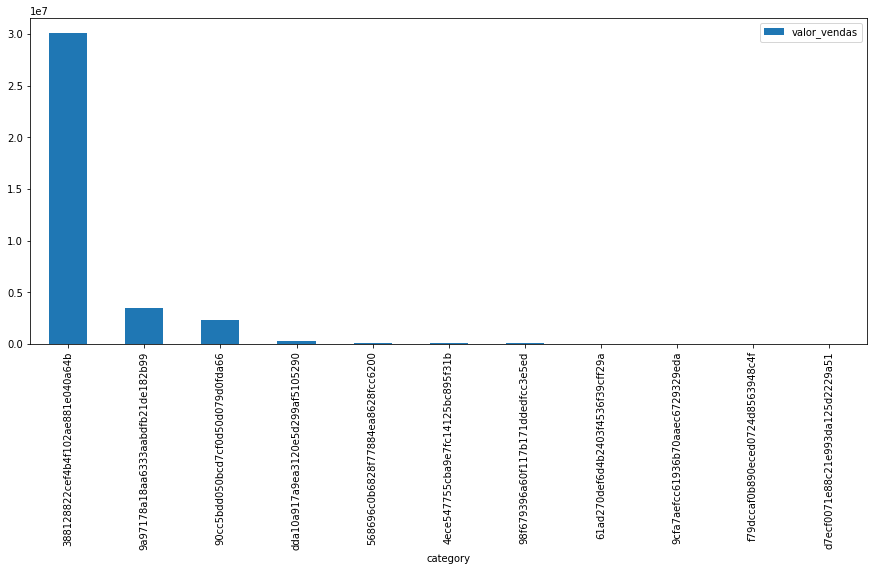

In [33]:
dfluiza2.groupby(by='category').agg(valor_vendas = ('price', 'sum')).reset_index().sort_values('valor_vendas', ascending = False).plot.bar(x= 'category', y = 'valor_vendas', figsize = (15, 6))

##Categoria de produto que mais sofreu variação

In [34]:
variacao_produto = dfluiza2.groupby('code').agg(variacao_preco = ('price', 'std')).reset_index().sort_values('variacao_preco', ascending = False)
variacao_produto.head()

,code,variacao_preco
51,4ceedf57303e127d31a164c7ae5791d8,801.210521
88,9e5dd3c1d252136c4351b84589dae2b5,594.962736
78,727673fa3e457bc596532b3eb26b23a0,490.714904
120,dd1935ffd0ee2b6ec159ba7867d11e57,372.893758
83,7e3713530b46887cff58a2e2ac433ac5,320.555942


In [35]:
filtro_preco = dfluiza2.groupby("code").agg({"price": ["min", "max", "std", "mean"]}).reset_index()
filtro_preco[(filtro_preco.code == '4ceedf57303e127d31a164c7ae5791d8' )]


code  price                                 
                                        min      max         std        mean
51  4ceedf57303e127d31a164c7ae5791d8  332.1  19152.0  801.210521  511.124213

##Descobrir a data com mais venda com a quantidade de vendas, e seus respectivos valores de compra.

---



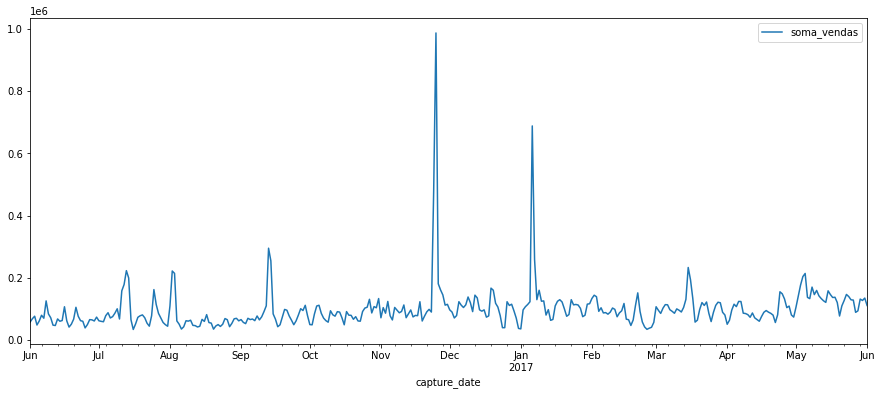

In [36]:
dfluiza2.groupby('capture_date').agg(soma_vendas = ('price', 'sum')).reset_index().plot(x='capture_date',y = 'soma_vendas', figsize = (15, 6))

In [37]:
data_vendas = dfluiza2.groupby('capture_date').agg(soma_vendas = ('price', 'sum'), quantidade_vendas = ('quantity', 'sum')).reset_index().sort_values('quantidade_vendas',ascending=False)
data_vendas.head()
##data_vendas[data_vendas['soma_vendas'] == data_vendas['soma_vendas'].max()].head(5)

,capture_date,soma_vendas,quantidade_vendas
177,2016-11-25,987335.99,5000
219,2017-01-06,688483.17,4747
176,2016-11-24,477622.14,2120
220,2017-01-07,259255.28,1489
104,2016-09-13,295426.02,1446


##Quais as categorias que tem a maior média de produtos comprados (por compra)

In [38]:
dfluiza2.groupby(['category']).agg(media_produtos = ('quantity', 'mean')).reset_index().sort_values('media_produtos', ascending=False)

,category,media_produtos
9,dda10a917a9ea3120e5d299af5105290,1.375000
5,98f679396a60f117b171ddedfcc3e5ed,1.120438
7,9cfa7aefcc61936b70aaec6729329eda,1.115385
4,90cc5bdd050bcd7cf0d50d079d0fda66,1.110877
6,9a97178a18aa6333aabdfb21de182b99,1.094562
0,388128822cef4b4f102ae881e040a64b,1.048262
10,f79dccaf0b890eced0724d8563948c4f,1.029851
3,61ad270def6d4b2403f4536f39cff29a,1.015000
1,4ece547755cba9e7fc14125bc895f31b,1.000000
2,568696c0b6828f77884ea8628fcc6200,1.000000


## *Conclusões*

Pudemos ver quais as categorias que mais vendem, mais sofrem alterações (Sazonais?? promoções??? estoque??), e as datas que mais são efetuadas compras (Black friday e Liquidação fantástica).